<a href="https://colab.research.google.com/github/yurikomuta/autoenconder-detection-fraud/blob/main/AUTO_ENCODER_CARTAO_DE_CREDITO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Auto-encoder Cartão de Crédito


In [1]:
# Bibliotecas utilizadas

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np
import os

from keras import layers
from keras.layers import Input, Dense
from keras.models import Model, Sequential 
from keras import regularizers

from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Carregar Dataset

In [5]:
df_credit_card = pd.read_csv('/content/drive/MyDrive/Autoencoder - INF317E/creditcard.csv', header=0)

In [6]:
df_credit_card.info()
df_credit_card.head(100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,64.0,-0.658305,0.406791,2.037461,-0.291298,0.147910,-0.350857,0.945373,-0.172560,0.025133,...,-0.156096,-0.238805,0.089877,0.421195,-0.352487,0.074783,-0.094192,-0.092493,54.99,0
96,64.0,0.959602,0.370711,0.888613,2.343244,0.352491,1.365515,-0.277771,0.516053,-0.700929,...,-0.155547,-0.403239,0.356504,-0.696881,-0.198718,-0.220268,0.068546,0.020797,7.55,0
97,67.0,-0.653445,0.160225,1.592256,1.296832,0.997175,-0.343000,0.469937,-0.132470,-0.197794,...,0.038363,0.336449,-0.014883,0.102959,-0.265322,-0.348637,0.011238,-0.049478,19.85,0
98,67.0,-1.494668,0.837241,2.628211,3.145414,-0.609098,0.258495,-0.012189,0.102136,-0.286164,...,-0.140047,0.355044,0.332720,0.718193,-0.219366,0.118927,-0.317486,-0.340783,28.28,0


## Análise Exploratória de Dados

In [7]:
df_credit_card.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [8]:
# Classe 
print(f"O Valor que as classes do DataSet Possui São: {np.unique(df_credit_card['Class'])}" )

O Valor que as classes do DataSet Possui São: [0 1]


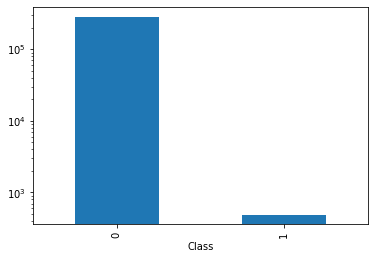

In [9]:
df_credit_card.groupby('Class')['Class'].count().plot.bar(logy=True)

In [39]:
# Correlação das V com Class
df_credit_card.corr()['Class'].sort_values(ascending=False)

Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.017082
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64

In [40]:
# Estatísticas 
df_credit_card.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,14.537951,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,5.847061,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,10.598194,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,15.010833,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,19.329722,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,23.999444,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## Transformando os dados

In [41]:
# Atualizando o Tempo no Dia
df_credit_card['Time'] = df_credit_card['Time'].apply(lambda t: (t/3600) % 24 )

In [45]:
# Simplificando o Dataset
normal_trans = df_credit_card[df_credit_card['Class'] == 0].sample(4000)
fraud_trans = df_credit_card[df_credit_card['Class'] == 1]

normal_trans.head()



,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
143548,0.006592,-0.128611,1.075975,0.138519,0.456091,-0.576381,-0.760609,0.044779,-0.301536,0.451043,...,0.091089,-0.301917,0.492016,0.483813,-1.356924,-0.177239,-1.313575,-0.145341,0.99,0
61743,0.003855,-1.543238,1.491762,0.714397,-0.756657,-0.460294,-0.225442,-0.125885,1.086177,-0.433652,...,-0.058679,-0.180161,0.051298,0.035290,-0.213853,0.314645,0.172725,0.100800,4.00,0
90159,0.004852,-3.169848,0.948929,-0.032998,0.540360,-1.609779,1.274438,-2.338781,2.536940,-1.778784,...,0.259608,0.707830,-0.132287,-0.590894,-0.551618,-0.133874,-0.779636,-0.344006,14.84,0
225085,0.004452,1.605885,0.763472,-1.959910,4.134407,1.176256,-0.023991,0.535264,-0.002322,-1.399431,...,-0.286041,-1.105800,0.182600,0.458314,-0.243379,-0.369177,-0.031390,0.041792,139.61,0
236085,0.004804,-0.388313,0.969079,0.461054,-1.294712,1.089623,-0.522115,1.223895,-0.125373,-0.676752,...,0.379878,1.107738,-0.419110,0.819028,0.287261,-0.284595,0.100693,0.135495,3.00,0


##Total de Transações


In [47]:
#Total de transações fraudulentas
fraud_trans.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [61]:
#Total de transações Não Fraude
normal_trans.Amount.describe()

count    4000.000000
mean       89.519435
std       231.461975
min         0.000000
25%         5.127500
50%        20.505000
75%        78.817500
max      4276.820000
Name: Amount, dtype: float64

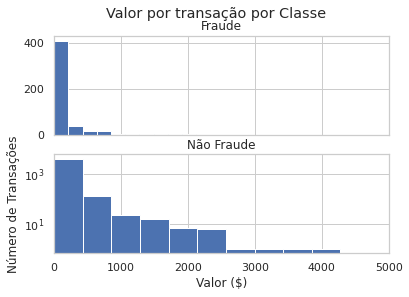

In [58]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True) 
f.suptitle('Valor por transação por Classe') 

bins = 10
ax1.hist(fraud_trans.Amount, bins = bins) 
ax1.set_title ('Fraude') 

ax2.hist(normal_trans.Amount, bins = bins) 
ax2.set_title('Não Fraude') 

plt.xlabel('Valor ($)') 
plt.ylabel('Número de Transações') 
plt.xlim( (0, 5000)) 
plt.yscale('log') 
plt.show();

In [46]:
reduced_set = normal_trans.append(fraud_trans).reset_index(drop=True)

In [13]:
print(f"Cleansed dataset shape : {reduced_set.shape}")

Cleansed dataset shape : (4492, 31)


## Dividir o conjunto de dados

In [14]:
# Dividindo o Banco de Dados com a Classificação
y = reduced_set['Class']
X = reduced_set.drop('Class', axis=1)


In [15]:
print(f"Shape of Features : {X.shape} and Target: {y.shape}")

Shape of Features : (4492, 30) and Target: (4492,)


## Trabalhando a Diminuição de Dimensionalidade 

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


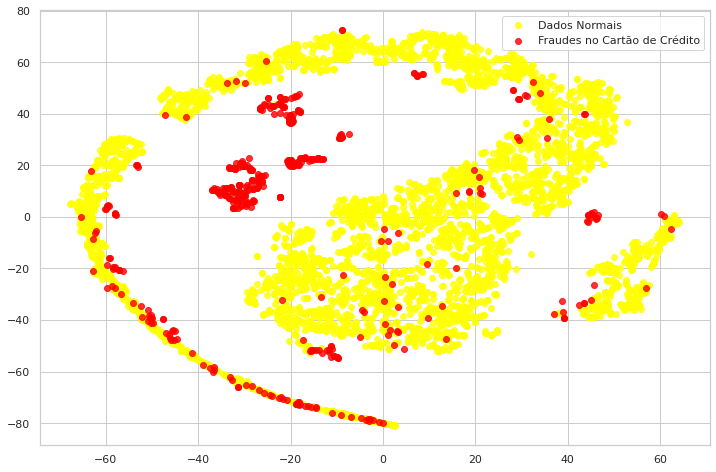

In [19]:
def tsne_plot(X, y):
      
    # Definindo o plano de fundo da plotagem
    sns.set(style ="whitegrid")
    #pca = PCA()
    tsne = TSNE(n_components = 2, random_state = 0)
      
    # Reduzindo a dimensionalidade dos dados
    X_transformed = tsne.fit_transform(X)
    
    plt.figure(figsize =(12, 8))
      
    # Construindo o gráfico de dispersão
    plt.scatter(X_transformed[np.where(y == 0), 0], 
                X_transformed[np.where(y == 0), 1],
                marker ='o', color ='yellow', linewidth =1,
                alpha = 0.8, label ='Dados Normais')
    plt.scatter(X_transformed[np.where(y == 1), 0],
                X_transformed[np.where(y == 1), 1],
                marker ='o', color ='red', linewidth =1,
                alpha = 0.8, label ='Fraudes no Cartão de Crédito')
  
    # Especificando a localização da legenda
    plt.legend(loc ='best')
      
    # Plotando os dados reduzidos
    plt.show()

tsne_plot(X,y)


#from sklearn.datasets import load_breast_cancer
#from sklearn.preprocessing import StandardScaler
#import mglearn
#cancer = load_breast_cancer()
#scaler = StandardScaler()
#scaler.fit(cancer.data)
#X_scaled = scaler.transform(cancer.data)

#from sklearn.decomposition import PCA
# keep the first two principal components of the data
#pca = PCA(n_components=2)
# fit PCA model to breast cancer data
#pca.fit(X_scaled)
# transform data onto the first two principal components
#X_pca = pca.transform(X_scaled)
#print("Original shape: {}".format(str(X_scaled.shape)))
#print("Reduced shape: {}".format(str(X_pca.shape)))



## Normalizando os Valores

In [21]:
scaler = RobustScaler().fit_transform(X)

# Dados dimensionados
X_scaled_normal = scaler[y == 0]
X_scaled_fraud = scaler[y == 1]

## Construindo um modelo de Auto Encoder

In [43]:
print(f"Formato dos dados de entrada : {X.shape[1]}")

Formato dos dados de entrada : 30


In [23]:
# Camada de entrada com uma forma de features/colunas do conjunto de dados
input_layer = Input(shape = (X.shape[1], ))

# Construindo uma rede encoder
encoded = Dense(500, activation= 'tanh', activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoded = Dense(250, activation= 'tanh', activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoded = Dense(125, activation='tanh', activity_regularizer=regularizers.l1(10e-5))(encoded)
encoded = Dense(62, activation='tanh', activity_regularizer=regularizers.l1(10e-5))(encoded)
encoded = Dense(31, activation = 'tanh', activity_regularizer=regularizers.l1(10e-5))(encoded)
encoded = Dense(50, activation='tanh')(encoded)

# Decodificando a Rede
decoded = Dense(31, activation='tanh')(encoded)
decoded = Dense(62, activation='tanh')(decoded)
decoded = Dense(125, activation='tanh')(decoded)
decoded = Dense(250, activation='tanh')(decoded)
decoded = Dense(500, activation='tanh')(decoded)

output_layer = Dense(X.shape[1], activation='tanh')(decoded)

auto_encoder = Model(input_layer, output_layer)

In [24]:
# Compilando o modelo
auto_encoder.compile(optimizer='adadelta', loss='mse')

# Treinando o Modelo
auto_encoder.fit(X_scaled_normal, X_scaled_normal, batch_size=32, epochs=100, shuffle=True, validation_split=0.20)

Epoch 1/100
100/100 [==============================] - 2s 10ms/step - loss: 1.5036 - val_loss: 2.3010
Epoch 2/100
100/100 [==============================] - 1s 7ms/step - loss: 1.4938 - val_loss: 2.2899
Epoch 3/100
100/100 [==============================] - 1s 7ms/step - loss: 1.4843 - val_loss: 2.2790
Epoch 4/100
100/100 [==============================] - 1s 8ms/step - loss: 1.4752 - val_loss: 2.2687
Epoch 5/100
100/100 [==============================] - 1s 7ms/step - loss: 1.4664 - val_loss: 2.2585
Epoch 6/100
100/100 [==============================] - 1s 7ms/step - loss: 1.4579 - val_loss: 2.2488
Epoch 7/100
100/100 [==============================] - 1s 7ms/step - loss: 1.4498 - val_loss: 2.2396
Epoch 8/100
100/100 [==============================] - 1s 7ms/step - loss: 1.4419 - val_loss: 2.2304
Epoch 9/100
100/100 [==============================] - 1s 8ms/step - loss: 1.4341 - val_loss: 2.2215
Epoch 10/100
100/100 [==============================] - 1s 7ms/step - loss: 1.4265 - val_l

## Utilizar Auto Encoder para os dados

In [25]:
latent_model = Sequential()
latent_model.add(auto_encoder.layers[0])
latent_model.add(auto_encoder.layers[1])
latent_model.add(auto_encoder.layers[2])
latent_model.add(auto_encoder.layers[3])
latent_model.add(auto_encoder.layers[4])
latent_model.add(auto_encoder.layers[5])

In [26]:
normal_tran_points = latent_model.predict(X_scaled_normal)
fraud_tran_points = latent_model.predict(X_scaled_fraud)


# Fazendo como uma coleção
encoded_X = np.append(normal_tran_points, fraud_tran_points, axis=0)
y_normal = np.zeros(normal_tran_points.shape[0])
y_fraud = np.ones(fraud_tran_points.shape[0])
encoded_y = np.append(y_normal, y_fraud, axis=0)


16/16 [==============================] - 0s 2ms/step


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


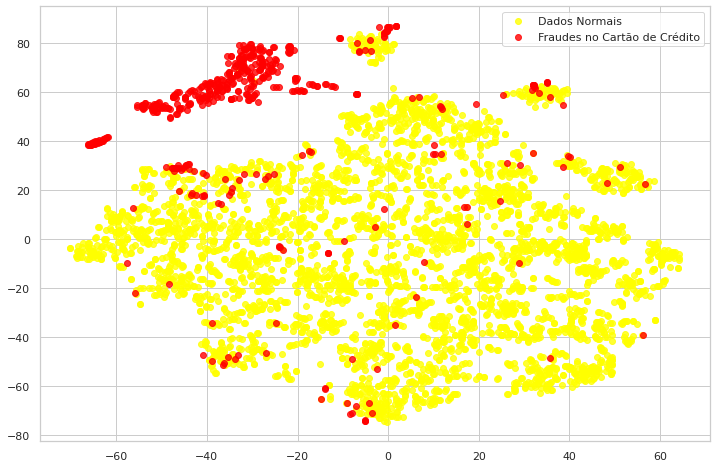

In [27]:
# Chamando a função de gráfico TSNE
tsne_plot(encoded_X, encoded_y)

## Divisão entre Treino e Teste

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_enc_train, X_enc_test, y_enc_train, y_enc_test = train_test_split(encoded_X, encoded_y, test_size=0.3)

In [29]:
print(f"Encoded train data X: {X_enc_train.shape}, Y: {y_enc_train.shape}, X_test :{X_enc_test.shape}, Y_test: {y_enc_test.shape}")
print(f"Treino Versos Teste: {X_train.shape}, Y: {X_train.shape}, X_test :{X_test.shape}, Y_test: {y_test.shape}")

Encoded train data X: (3144, 50), Y: (3144,), X_test :(1348, 50), Y_test: (1348,)
Treino Versos Teste: (3144, 30), Y: (3144, 30), X_test :(1348, 30), Y_test: (1348,)


## Classificação Não Linear

In [30]:
# Instância de SVM
svc_clf = SVC()

svc_clf.fit(X_train, y_train)

svc_predictions = svc_clf.predict(X_test)

In [31]:
print("Relatório de resultados na Classificação \n {0}".format(classification_report(y_test, svc_predictions)))

Relatório de resultados na Classificação 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      1196
           1       0.99      0.50      0.66       152

    accuracy                           0.94      1348
   macro avg       0.96      0.75      0.82      1348
weighted avg       0.95      0.94      0.93      1348



In [33]:
print("Acurácia \n {:.2f}".format(accuracy_score(y_test, svc_predictions)))

Acurácia 
 0.94


## Classificação Linear


In [34]:
lr_clf = LogisticRegression()

lr_clf.fit(X_enc_train, y_enc_train)

# Predição dos dados de teste
predictions = lr_clf.predict(X_enc_test)

In [35]:
print("Dados de Classificação \n {0}".format(classification_report(y_enc_test, predictions)))


Dados de Classificação 
               precision    recall  f1-score   support

         0.0       0.97      1.00      0.98      1199
         1.0       1.00      0.72      0.84       149

    accuracy                           0.97      1348
   macro avg       0.98      0.86      0.91      1348
weighted avg       0.97      0.97      0.97      1348



In [36]:
print("Fator de Acurácia : {:.2f}".format(accuracy_score(y_enc_test, predictions)))

Fator de Acurácia : 0.97
